In [27]:
# imports

import io
import os
import sys
import csv
import math

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.font_manager as fm
import matplotlib.transforms as transforms

import pandas as pd
import numpy as np

In [28]:
#DATA PREPROCESSING

rows = []
filename = 'fasttext-extr.csv'
filename_no_extension = filename.split('.')[0]
print(filename_no_extension)
with open(filename, 'r') as csvfile:
    rows = csv.reader(csvfile, delimiter=',', quotechar='|')
    rows = list(rows)
    
#rows = np.concatenate((rows[0:9],rows[10:])) #exclude second translation
#rows = np.concatenate((rows[0:7],rows[8:])) #exclude second translation
#rows = np.concatenate((rows[0:3],rows[4:])) #exclude second translation

numerical_columns = [row[1:] for row in rows]

numerical_rows = numerical_columns[1:len(rows)]

row_labels = [row[0] for row in rows]
row_labels = row_labels[1:]
print(row_labels)
column_labels = numerical_columns[0]
for row in numerical_rows:
    for num in row:
        try:
            float(num)
        except ValueError:
            print("Not a float")
            print('num:' + num + ':num')
scores_array = np.array(numerical_rows)
num_rows = scores_array.shape[0]
scores_array[:,0] = [i for i in range(0,num_rows)]

# delete last column, it's empty
#scores_array = np.delete(scores_array, 4, 1)
scores = pd.DataFrame(scores_array)

scores.columns = column_labels


scores = scores.astype(float)

fasttext-extr
['original', 'Trans', 'Dilat', 'Homot', 'Relfec', 'Rotat', 'distAE', '5nn thresh', '5nn weighted', '5nn', 'rand']


In [29]:
# TEMP TRANSFORM
#scores.loc[:,'Silhouette score'] = (scores.loc[:,'Silhouette score'] + 1) / 2

print(scores)

    scale  Relation Extraction (F1)  Sentence Polarity (Acc)  Sentiment (Acc)  \
0     0.0                    0.7247                   0.9104           0.7384   
1     1.0                    0.7127                   0.8940           0.7199   
2     2.0                    0.7215                   0.9084           0.7832   
3     3.0                    0.6627                   0.7832           0.5767   
4     4.0                    0.7384                   0.9076           0.7369   
5     5.0                    0.7294                   0.9104           0.7366   
6     6.0                    0.6392                   0.8312           0.5986   
7     7.0                    0.5130                   0.7264           0.7589   
8     8.0                    0.6647                   0.8320           0.7580   
9     9.0                    0.6626                   0.8444           0.7455   
10   10.0                    0.5674                   0.7144           0.6520   

    Subjectivity (Acc)  SNL

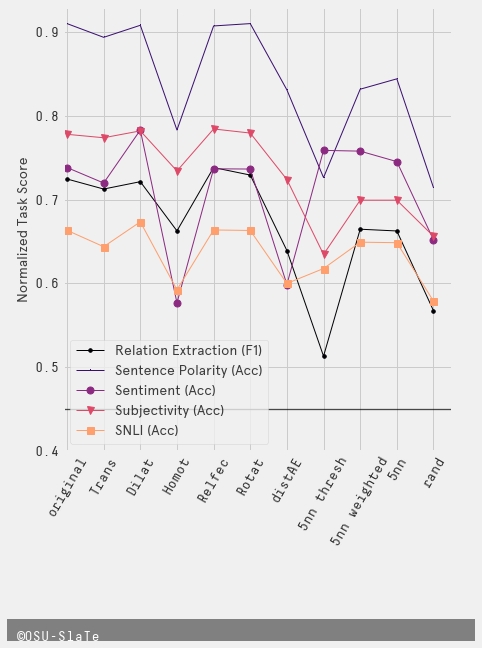

In [34]:
# PLOTTING

#================================================
# PARAMETERS
#================================================

# size of ENTIRE PLOT
plot_height = 11 # 7.25
plot_width = 6.5
num_empty_ticks = 0
num_xtick_labels = len(row_labels) + num_empty_ticks
#assert num_xtick_labels > len(row_labels)

# dataframe
df = scores

# x-axis
xaxis = 'scale'

# y-axis
yaxis = None

# text
title_text =  filename + " Embeddings"
title_text = ""
subtitle_text = ""
xlabel = ""
ylabel = "Normalized Task Score"
banner_text = "©OSU-SlaTe"

# edges of plot in figure (padding)
top = 0.8
bottom = 0.24 #0.18 -- old
left = 0.12 # 0.1 -- old
right = 0.95

# change title_pad to adjust xpos of title in pixels
# + is left, - is right
title_pad = 0 

# opacity
text_opacity = 0.75
xaxis_opacity = 0.7

# sizing
'''
tick_label_size = 7
legend_size = 8
axis_label_size = 10
banner_text_size = 10
'''
tick_label_size = 14
legend_size = 14
axis_label_size = 14
banner_text_size = 14

# import font
prop = fm.FontProperties(fname='DecimaMonoPro.ttf')
prop2 = fm.FontProperties(fname='apercu_medium_pro.otf')
prop3 = fm.FontProperties(fname='Apercu.ttf')
prop4 = fm.FontProperties(fname='Apercu.ttf', size=legend_size)

#ticks_font = matplotlib.font_manager.FontProperties(family='DecimaMonoPro', style='normal', size=12, weight='normal', stretch='normal')

#================================================
# END OF PARAMETERS
#================================================

# figure initialization
fig, ax = plt.subplots(figsize=(plot_width, plot_height))
plt.sca(ax)
style.use('fivethirtyeight')

#===PLOT===
graph = df.plot(x=xaxis, 
                y=yaxis,
                ax=ax, 
                use_index=True)
                #legend=True)
# john
plt.legend(loc='best')

# hacks
ax.set_ylim(top=0.93, bottom=0.4)
ax.set_xlim(left=-0.1, right=10.5)

MARKERS=['.',',','o','v','s','p','P','H','+','x','X','D','d','|','_','<','>','^','8','*','h','1','2','3','4']



# distinct line colors/styles for many lines
NUM_COLORS = len(column_labels)-1
#LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
LINE_STYLES = ['solid']
NUM_STYLES = len(LINE_STYLES)
NUM_MARKERS = len(MARKERS)
assert len(MARKERS) >= NUM_COLORS
cm = plt.get_cmap('magma') #'gist_rainbow'
for i in range(NUM_COLORS):
    plt.gca().get_lines()[i].set_color(cm(i//NUM_STYLES*float(NUM_STYLES)/NUM_COLORS))
    plt.gca().get_lines()[i].set_marker(MARKERS[i])
    #plt.gca().get_lines()[i].set_linestyle(LINE_STYLES[i%NUM_STYLES])
    plt.gca().get_lines()[i].set_linewidth(1.0)
    plt.gca().get_lines()[i].set_markersize(7.0)

# add axis labels
plt.xlabel(xlabel, 
           fontproperties=prop3, 
           fontsize = axis_label_size, 
           alpha=text_opacity)
plt.ylabel(ylabel, 
           fontproperties=prop3, 
           fontsize = axis_label_size, 
           alpha=text_opacity)

# change font of legend
L = graph.legend(prop={'size': legend_size})
plt.setp(L.texts, fontproperties=prop4, alpha=text_opacity)

# set size of tick labels
graph.tick_params(axis = 'both', 
                  which = 'major', 
                  labelsize = tick_label_size)

# set fontname for tick labels
for tick in graph.get_xticklabels():
    tick.set_fontname("DecimaMonoPro")
for tick in graph.get_yticklabels():
    tick.set_fontname("DecimaMonoPro")
    
# set column_labels
graph.set_xticklabels(row_labels)
plt.xticks(np.arange(0, num_xtick_labels, 1.0),rotation=60)
    
# set color for tick labels
[t.set_color('#303030') for t in ax.xaxis.get_ticklabels()]
[t.set_color('#303030') for t in ax.yaxis.get_ticklabels()]

# create bolded x-axis
graph.axhline(y = 0.45, # 0
              color = 'black', 
              linewidth = 1.3, 
              alpha = xaxis_opacity)

# transforms the x axis to figure fractions, and leaves y axis in pixels
xfig_trans = transforms.blended_transform_factory(fig.transFigure, transforms.IdentityTransform())
yfig_trans = transforms.blended_transform_factory(transforms.IdentityTransform(), fig.transFigure)

# banner positioning
banner_y = math.ceil(banner_text_size * 0.6)

# banner text
banner = plt.annotate(banner_text, 
         xy=(0.02, banner_y*0.8), 
         xycoords=xfig_trans,
         fontsize = banner_text_size, 
         color = '#FFFFFF', 
         fontname='DecimaMonoPro')

# banner background height parameters
pad = 2 # points
bb= ax.get_window_extent()
h = bb.height/fig.dpi
height = ((banner.get_size()+2*pad)/72.)/h

# banner background
rect = plt.Rectangle((0,0), 
                     width=1, 
                     height=height,
                     transform=fig.transFigure, 
                     zorder=3,
                     fill=True, 
                     facecolor="grey", 
                     clip_on=False)
ax.add_patch(rect)

#transform coordinate of left
display_left_tuple = xfig_trans.transform((left,0))
display_left = display_left_tuple[0]

# shift title
title_shift = math.floor(tick_label_size * 2.6)
title_shift += title_pad

# title
graph.text(x = display_left - title_shift, y = 0.9, 
           transform = yfig_trans,
           s = title_text,
           fontproperties = prop2,
           weight = 'bold', 
           fontsize = 28,
           alpha = text_opacity)

# subtitle, +1 accounts for font size difference in title and subtitle
graph.text(x = display_left - title_shift + 1, y = 0.84, 
           transform = yfig_trans,
           s = subtitle_text,
           fontproperties=prop3,
           fontsize = 15, 
           alpha = text_opacity)


# adjust position of subplot in figure
plt.subplots_adjust(top=top)
plt.subplots_adjust(bottom=bottom)
plt.subplots_adjust(left=left)
plt.subplots_adjust(right=right)

# save to .svg
plt.savefig(filename_no_extension + ".svg", dpi=300)